In [10]:
import time
import yfinance as yf
import dcor
import pandas as pd
import matplotlib.pyplot as plt
from machine_learning_finance import get_coin_data_frames


In [11]:
file_path = '../data/inverse_pairs.csv'
pairs_df = pd.read_csv(file_path)
coins_df = pd.read_csv('../data/inverse_coins.csv')

In [20]:
def calculate_correlation(main, inverse):
    # Calculate the daily returns
    main_returns = main.pct_change().dropna()
    inverse_returns = inverse.pct_change().dropna()

    # Compute the distance correlation
    distance_correlation = dcor.distance_correlation(main_returns, inverse_returns)

    return distance_correlation, main_returns, inverse_returns

def process_pairs(pairs_df, start_date='2020-01-01', end_date='2022-12-31'):
    correlations = []

    for index, row in pairs_df.iterrows():
        # be polite
        time.sleep(0.25)

        #do it
        main_ticker = row['Main']
        inverse_ticker = row['Inverse']

        # Download the data from yfinance
        main_data = yf.download(main_ticker, start=start_date, end=end_date)
        inverse_data = yf.download(inverse_ticker, start=start_date, end=end_date)

        # Extract the adjusted closing prices
        main_adj_close = main_data['Adj Close']
        inverse_adj_close = inverse_data['Adj Close']

        distance_correlation, main_returns, inverse_returns = calculate_correlation(main_adj_close, inverse_adj_close)

        correlations.append({
            'Main': main_ticker,
            'Inverse': inverse_ticker,
            'Distance_Correlation': distance_correlation,
            'Main_Returns': main_returns,
            'Inverse_Returns': inverse_returns
        })

    return correlations

def process_coins(coins_df):
    for index, row in coins_df.iterrows():
        # be polite
        time.sleep(0.25)

        #do it
        main_ticker = row['Main']
        inverse_ticker = row['Inverse']
        print(main_ticker, inverse_ticker)
        # Download the data from crypto
        main_data = get_coin_data_frames(365, main_ticker)
        inverse_data = get_coin_data_frames(365, inverse_ticker)

        # Extract the adjusted closing prices
        main_adj_close = main_data['Close']
        inverse_adj_close = inverse_data['Close']

        distance_correlation, main_returns, inverse_returns = calculate_correlation(main_adj_close, inverse_adj_close)

        correlations.append({
            'Main': main_ticker,
            'Inverse': inverse_ticker,
            'Distance_Correlation': distance_correlation,
            'Main_Returns': main_returns,
            'Inverse_Returns': inverse_returns
        })
    return correlations

# started using matplotlib. while plotly is pretty and great for interactivity, it opens tabs in a browser
# when this stuff gets ported to cmd line utils. 
def render_charts(correlations_df):
    for index, row in correlations_df.iterrows():
        main_ticker = row['Main']
        inverse_ticker = row['Inverse']
        distance_correlation = row['Distance_Correlation']
        main_returns = row['Main_Returns']
        inverse_returns = row['Inverse_Returns']

        plt.figure(figsize=(10, 6))
        plt.scatter(main_returns, inverse_returns, alpha=0.5)
        plt.xlabel(f'{main_ticker} Returns')
        plt.ylabel(f'{inverse_ticker} Returns')
        plt.title(f'{main_ticker} vs {inverse_ticker} (Distance Correlation: {distance_correlation:.4f})')
        plt.grid(True)
        plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
BTC3L-USDT BTC3S-USDT
ETH3L-USDT E

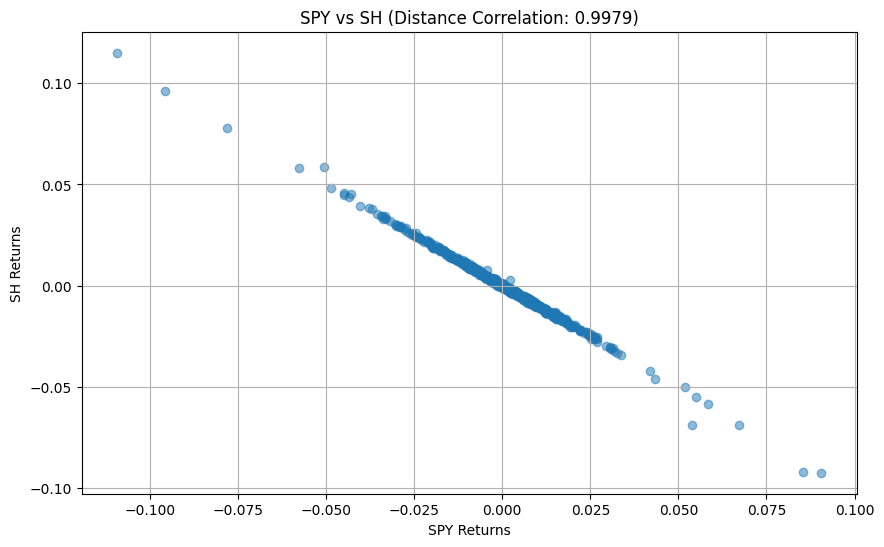

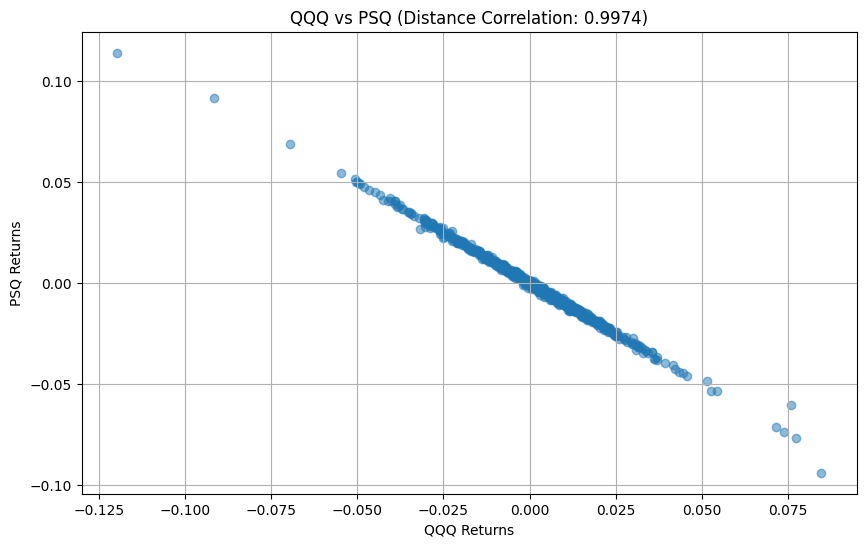

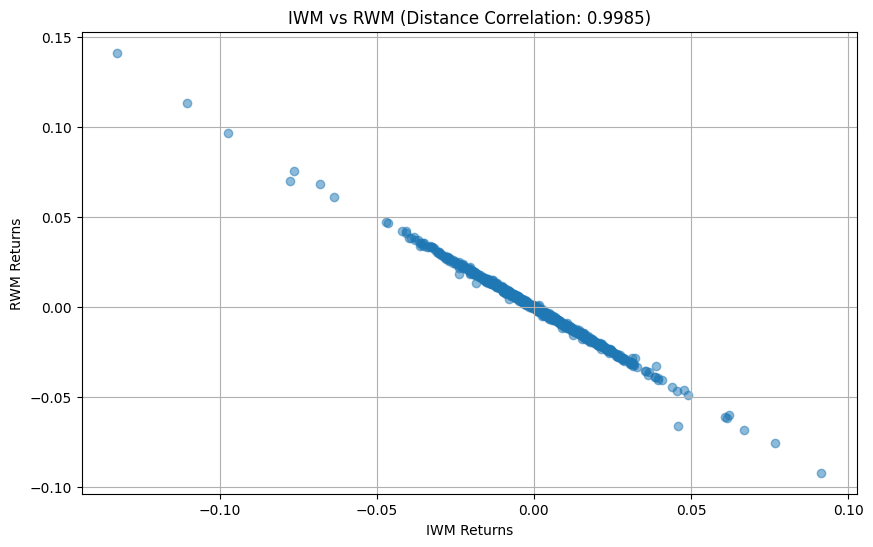

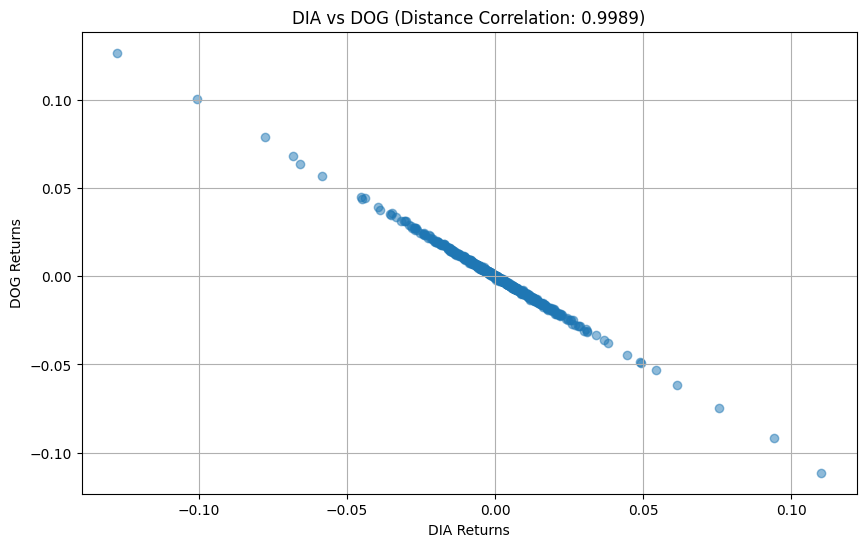

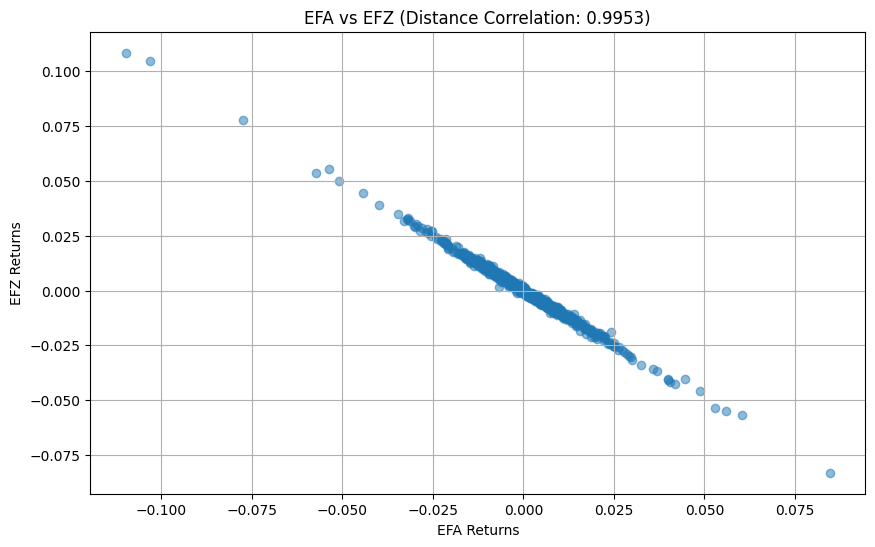

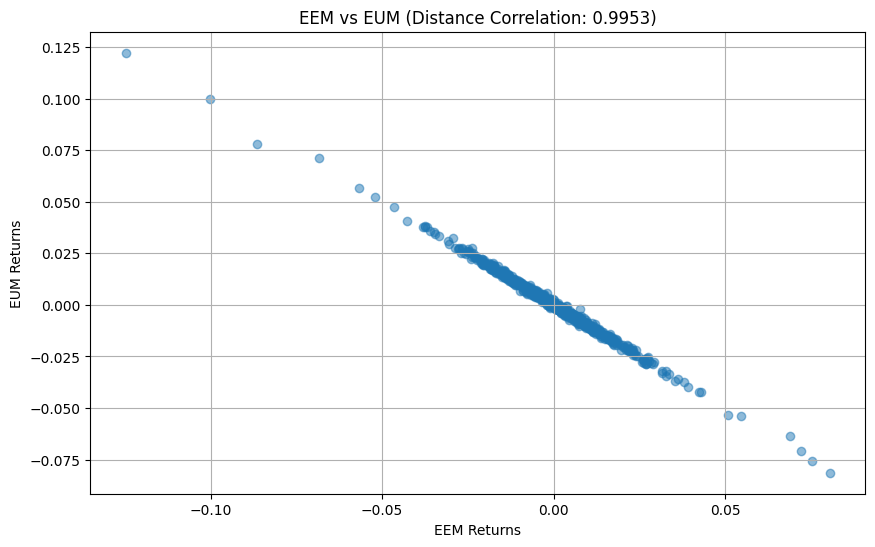

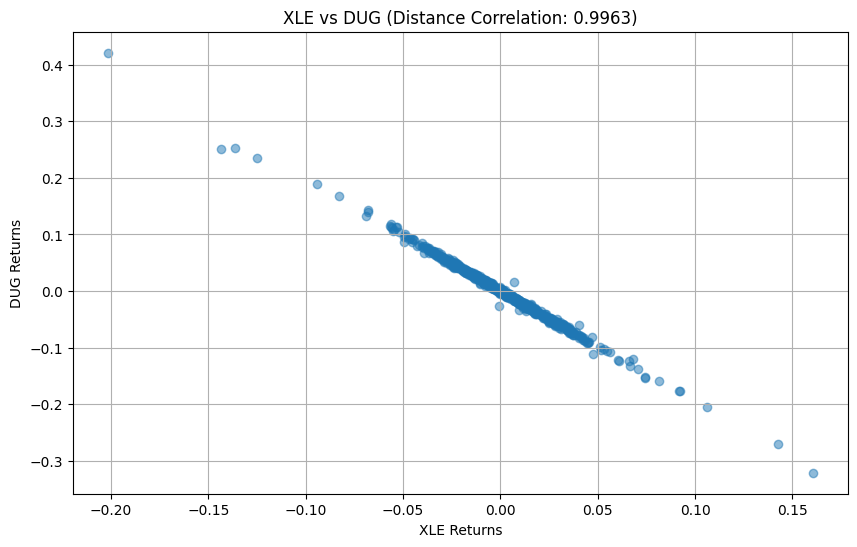

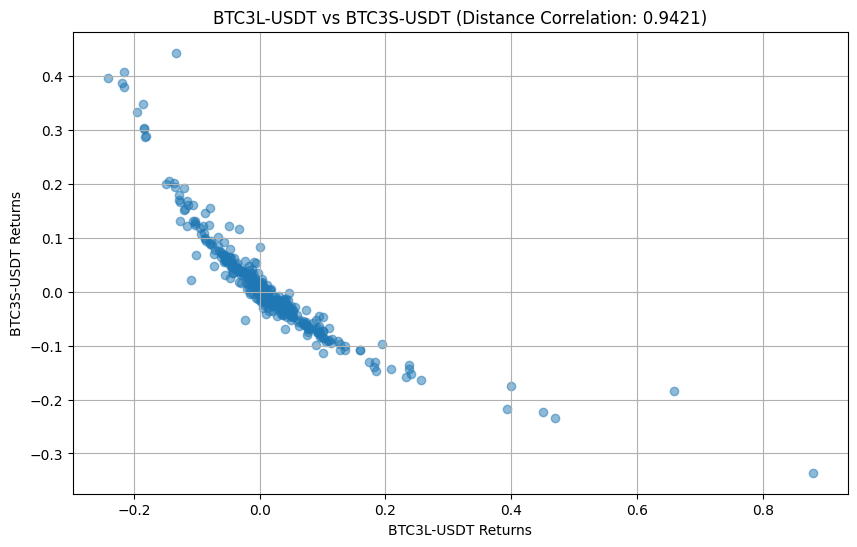

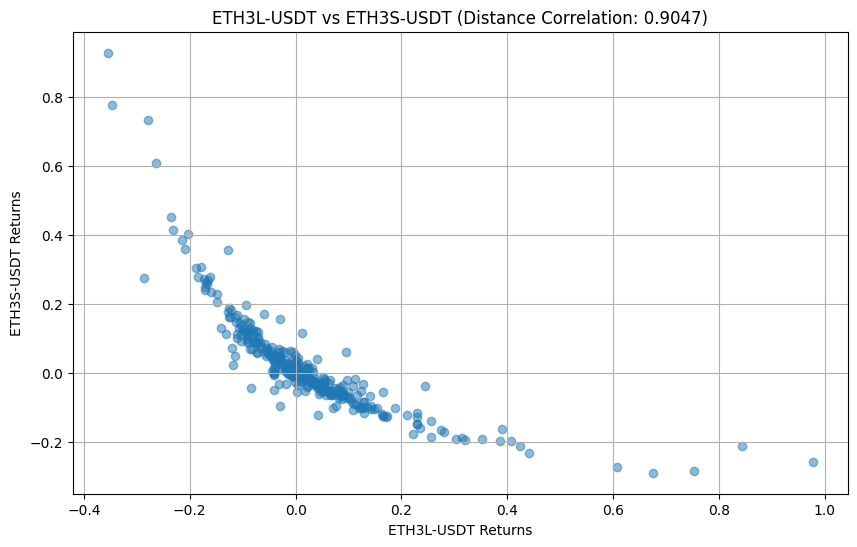

In [21]:

correlations = process_pairs(pairs_df)
correlation_coin = process_coins(coins_df)
correlations_df = pd.DataFrame(correlations)
render_charts(correlations_df)